In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from collections import Counter

In [2]:
os.getcwd()

'C:\\Users\\alxgr\\Documents\\UVA\\DSI\\Fall 2018\\SYS\\Final Project\\MS-MARCO-Analysis\\code'

In [3]:
os.chdir('../../data')

In [4]:
os.getcwd()

'C:\\Users\\alxgr\\Documents\\UVA\\DSI\\Fall 2018\\SYS\\Final Project\\data'

In [5]:
q_tr =pd.read_csv('train_query_corpus.csv')
q_te = pd.read_csv('test_query_corpus.csv')

In [6]:
q_tr.head()

,Unnamed: 0,qid,text,tokens,newtext
0,0,634306,what does chattel mean on credit history,"['doe', 'chattel', 'mean', 'credit', 'histori']",doe chattel mean credit histori
1,1,920825,what was the great leap forward brainly,"['wa', 'great', 'leap', 'forward', 'brainli']",wa great leap forward brainli
2,2,510633,tattoo fixers how much does it cost,"['tattoo', 'fixer', 'much', 'doe', 'cost']",tattoo fixer much doe cost
3,3,737889,what is decentralization process.,"['decentr', 'process']",decentr process
4,4,278900,how many cars enter the la jolla concours d' e...,"['mani', 'car', 'enter', 'la', 'jolla', 'conco...",mani car enter la jolla concour eleg


In [7]:
q_te.head()

,Unnamed: 0,qid,text,tokens,newtext
0,0,1048579,what is pcnt,['pcnt'],pcnt
1,1,1048580,what is pcb waste,"['pcb', 'wast']",pcb wast
2,2,1048581,what is pbis?,['pbi'],pbi
3,3,1048582,what is paysky,['payski'],payski
4,4,1048583,what is paydata,['paydata'],paydata


In [8]:
passages = pd.read_csv('all_passages_tokenized.csv')

In [9]:
sum(passages['newtext'] == None)


0

In [10]:
passages.head()

,Unnamed: 0,id,newtext
0,0,1000001,capit capit bone capit bone capit bone capit b...
1,1,1000002,capit capit bone capit capit rate capit capit ...
2,2,1000003,recent studi lamiacea secretori structur corsi...
3,3,1000004,look onlin definit capit medic dictionari capi...
4,4,1000005,bone hand arm read bone hand arm use link thi ...


# Duplicate Entries and Word Frequency
Note that these happen respectively as a set for each corpus, not all duplicate entry and then all word frequency

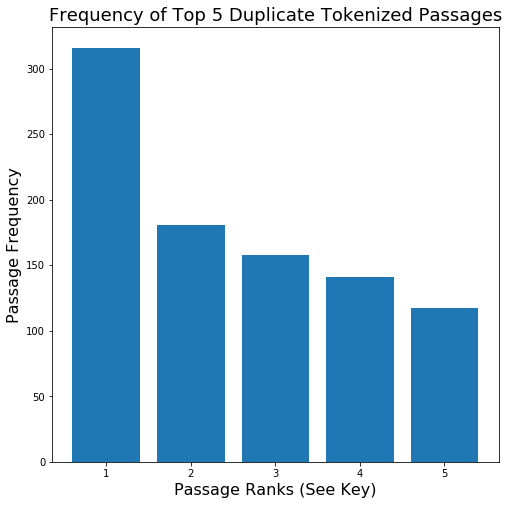

In [11]:
# https://stackoverflow.com/questions/35596128/how-to-generate-a-word-frequency-histogram-where-bars-are-ordered-according-to
# here we have passages that are tokenized to the exact same strings
# this will show us the common passages that occur most frequently similarity in terms of tokenized words 
# (before removing sparse words)

word_list = passages.loc[:,'newtext']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.set_title('Frequency of Top 5 Duplicate Tokenized Passages', fontsize=18)

counts = dict(Counter(word_list).most_common(5))

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))+ 1

bar_width = 0.35

ax.bar(indexes, values)

# add labels
ax.set_xticks(indexes)

ax.set_xlabel('Passage Ranks (See Key)', fontsize= 16)
ax.set_ylabel('Passage Frequency', fontsize= 16)

plt.show()

In [12]:
counts; # shows what each of the top 5 rankings correspond to

In [13]:
# cleanly display the above

for one_label in range(len(labels)):
    print ('Frequency' , str(one_label + 1) +':' , labels[one_label])
    print()
# labels[0]

Frequency 1: retriev http

Frequency 2: week week high highest sale price stock ha achiev dure regular trade hour dure recent week period week low lowest sale price stock ha fallen dure regular trade hour dure recent week period market cap measur estim valu common equiti secur compani equival

Frequency 3: nan

Frequency 4: exampl sentenc select automat variou onlin news sourc reflect current usag word view express exampl repres opinion editor send us feedback

Frequency 5: exampl sentenc select automat variou onlin news sourc reflect current usag word view express exampl repres opinion editor



In [14]:
passage_words = passages.loc[:,'newtext'].str.cat(sep=' ').split()

In [15]:
# passage_words[1]

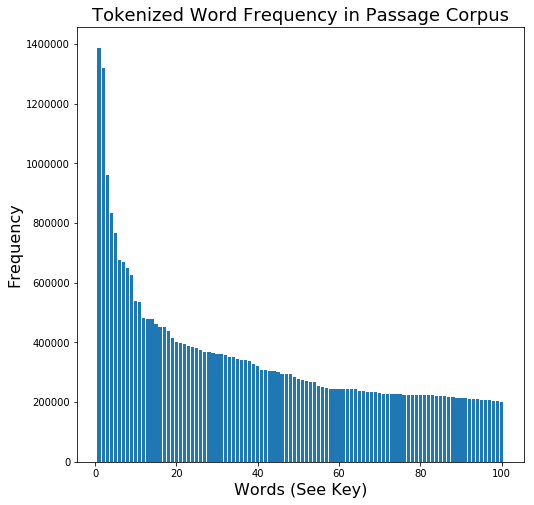

In [16]:
word_list = passage_words
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
counts = dict(Counter(word_list).most_common(100))
ax.set_title('Tokenized Word Frequency in Passage Corpus', fontsize= 18)


labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels)) + 1

ax.bar(indexes, values)

# add labels

ax.set_xlabel('Words (See Key)', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)

plt.show()

In [17]:
counts

{'thi': 1387977,
 'use': 1320867,
 'wa': 962676,
 'one': 833833,
 'ha': 767275,
 'also': 675808,
 'year': 671007,
 'may': 650830,
 'time': 625355,
 'state': 539035,
 'name': 536574,
 'make': 482543,
 'day': 479840,
 'includ': 477537,
 'new': 463388,
 'caus': 453134,
 'first': 451851,
 'get': 439436,
 'like': 416225,
 'two': 401369,
 'need': 397029,
 'number': 396401,
 'mean': 387498,
 'call': 383230,
 'peopl': 380819,
 'work': 374969,
 'ani': 368017,
 'type': 366474,
 'onli': 363377,
 'take': 360260,
 'mani': 359851,
 'cost': 356282,
 'hi': 352810,
 'water': 351229,
 'averag': 344083,
 'form': 340565,
 'per': 340544,
 'system': 339383,
 'differ': 329368,
 'unit': 322331,
 'bodi': 306474,
 'part': 306065,
 'help': 304816,
 'blood': 304758,
 'provid': 299557,
 'see': 295006,
 'cell': 293894,
 'servic': 293774,
 'area': 284819,
 'gener': 278217,
 'inform': 273803,
 'hour': 269970,
 'food': 268690,
 'person': 268216,
 'way': 254593,
 'rate': 249505,
 'locat': 246614,
 'find': 245526,
 'cha

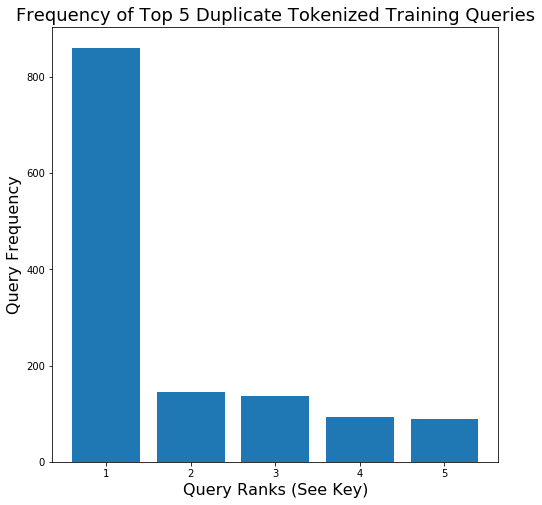

In [18]:
word_list = q_tr.loc[:,'newtext']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
counts = dict(Counter(word_list).most_common(5))

ax.set_title('Frequency of Top 5 Duplicate Tokenized Training Queries', fontsize=18)

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels)) + 1

bar_width = 0.35

ax.bar(indexes, values)

# add labels
ax.set_xticks(indexes)

ax.set_xlabel('Query Ranks (See Key)', fontsize= 16)
ax.set_ylabel('Query Frequency', fontsize= 16)
plt.show()

In [19]:
# cleanly display the q_training frequency of entirely duplicate tokenized queries

for one_label in range(len(labels)):
    print ('Frequency' , str(one_label + 1) +':' , labels[one_label])
    print()
# labels[0]

Frequency 1: nan

Frequency 2: definit

Frequency 3: area code

Frequency 4: defin

Frequency 5: doe mean



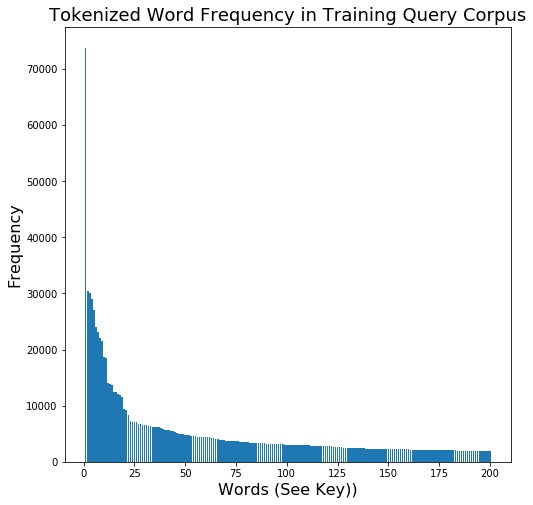

In [20]:
word_list = q_tr.loc[:,'newtext'].str.cat(sep=' ').split()
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
counts = dict(Counter(word_list).most_common(200))

ax.set_title('Tokenized Word Frequency in Training Query Corpus', fontsize=18)

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels)) + 1

bar_width = 0.35

ax.bar(indexes, values)

# add labels

ax.set_xlabel('Words (See Key))', fontsize= 16)
ax.set_ylabel('Frequency', fontsize= 16)


plt.show()

In [21]:
# words within training queries
counts

{'doe': 73821,
 'definit': 30420,
 'mean': 30001,
 'long': 29051,
 'cost': 27094,
 'much': 24106,
 'wa': 23131,
 'mani': 22133,
 'caus': 21586,
 'averag': 18738,
 'use': 18438,
 'whi': 13995,
 'name': 13949,
 'number': 13607,
 'counti': 12374,
 'get': 12366,
 'type': 12158,
 'make': 11936,
 'take': 11605,
 'defin': 9411,
 'differ': 9271,
 'time': 8292,
 'salari': 7191,
 'need': 7145,
 'day': 7031,
 'food': 7029,
 'temperatur': 6803,
 'price': 6796,
 'work': 6590,
 'call': 6548,
 'year': 6544,
 'weather': 6433,
 'state': 6417,
 'age': 6273,
 'blood': 6190,
 'per': 6149,
 'symptom': 6137,
 'locat': 6072,
 'good': 5871,
 'water': 5626,
 'system': 5604,
 'first': 5595,
 'tax': 5565,
 'test': 5539,
 'medic': 5267,
 'start': 5190,
 'cell': 5006,
 'kind': 4948,
 'play': 4937,
 'phone': 4836,
 'effect': 4716,
 'new': 4699,
 'eat': 4632,
 'old': 4550,
 'calori': 4529,
 'come': 4496,
 'cook': 4492,
 'us': 4484,
 'made': 4412,
 'diseas': 4375,
 'pay': 4355,
 'bodi': 4333,
 'last': 4297,
 'chang':

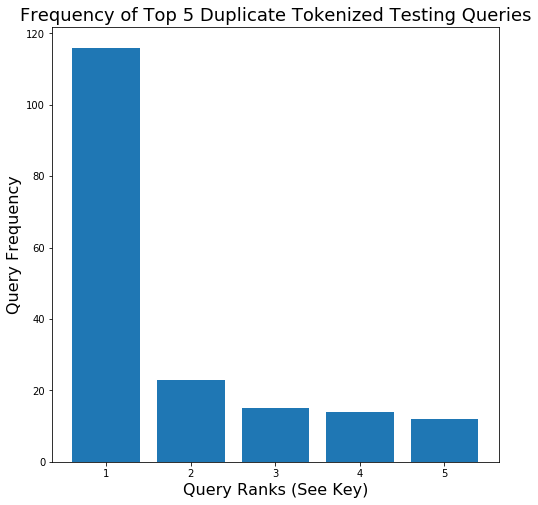

In [22]:
word_list = q_te.loc[:,'newtext']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
counts = dict(Counter(word_list).most_common(5))

ax.set_title('Frequency of Top 5 Duplicate Tokenized Testing Queries', fontsize=18)

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels)) + 1

bar_width = 0.35

ax.bar(indexes, values)

# add labels
ax.set_xticks(indexes)

ax.set_xlabel('Query Ranks (See Key)', fontsize= 16)
ax.set_ylabel('Query Frequency', fontsize= 16)

plt.show()

In [23]:
# cleanly display the above

for one_label in range(len(labels)):
    print ('Frequency' , str(one_label + 1) +':' , labels[one_label])
    print()
# labels[0]

Frequency 1: nan

Frequency 2: definit

Frequency 3: doe mean

Frequency 4: mean

Frequency 5: use



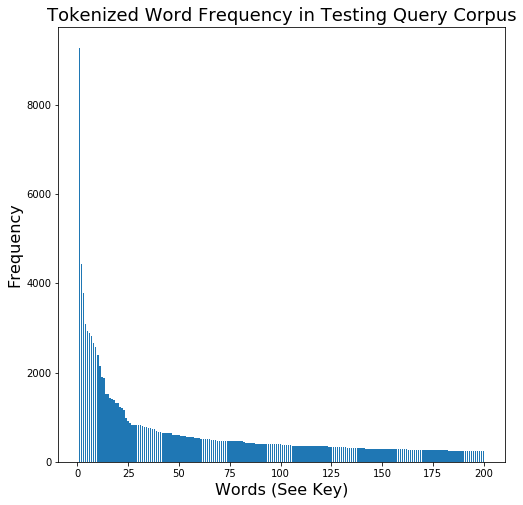

In [24]:
word_list = q_te.loc[:,'newtext'].str.cat(sep=' ').split()
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
counts = dict(Counter(word_list).most_common(200))

ax.set_title('Tokenized Word Frequency in Testing Query Corpus', fontsize=18)

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels)) + 1

bar_width = 0.35

ax.bar(indexes, values)

# add labels

ax.set_xlabel('Words (See Key)', fontsize= 16)
ax.set_ylabel('Frequency', fontsize= 16)


plt.show()

In [25]:
counts

{'doe': 9276,
 'mean': 4429,
 'definit': 3791,
 'long': 3089,
 'wa': 2932,
 'mani': 2887,
 'much': 2812,
 'caus': 2667,
 'cost': 2580,
 'use': 2386,
 'number': 2153,
 'whi': 1898,
 'averag': 1873,
 'get': 1529,
 'type': 1528,
 'name': 1421,
 'counti': 1410,
 'make': 1387,
 'take': 1326,
 'defin': 1324,
 'differ': 1236,
 'weather': 1194,
 'time': 1150,
 'price': 980,
 'state': 909,
 'need': 866,
 'food': 828,
 'work': 827,
 'day': 819,
 'phone': 818,
 'symptom': 813,
 'year': 800,
 'tax': 780,
 'temperatur': 778,
 'water': 759,
 'effect': 758,
 'call': 738,
 'age': 726,
 'test': 693,
 'blood': 665,
 'medic': 662,
 'salari': 655,
 'system': 648,
 'per': 645,
 'good': 642,
 'first': 636,
 'locat': 608,
 'benefit': 604,
 'kind': 604,
 'old': 597,
 'play': 586,
 'us': 585,
 'start': 583,
 'ha': 566,
 'new': 557,
 'cell': 554,
 'calori': 553,
 'car': 537,
 'eat': 536,
 'word': 526,
 'one': 514,
 'chang': 509,
 'bodi': 509,
 'come': 504,
 'made': 502,
 'popul': 491,
 'peopl': 490,
 'go': 486,

# Length Analysis

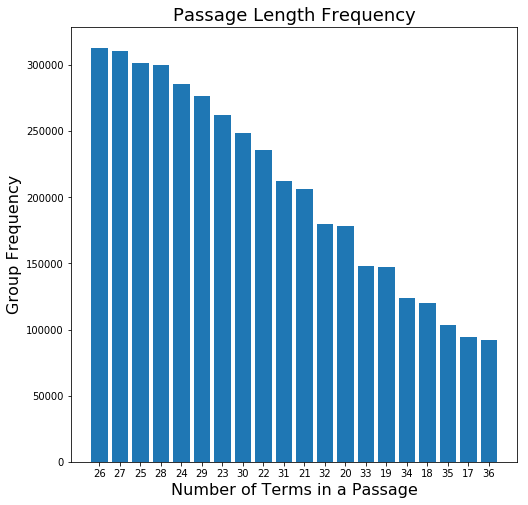

In [26]:
entry_list = passages.loc[:,'newtext']
entry_lengths = []
for entry in entry_list:
    if type(entry) == float:
        entry_lengths.append(0)
    else:
        entry_lengths.append(len(entry.split()))


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)

counts = dict(Counter(entry_lengths).most_common(20))

ax.set_title('Passage Length Frequency',fontsize=18)



labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

ax.bar(indexes, values, tick_label= labels)

ax.set_xlabel('Number of Terms in a Passage', fontsize= 16)
ax.set_ylabel('Group Frequency', fontsize= 16)

plt.show()

In [27]:
labels

array([26, 27, 25, 28, 24, 29, 23, 30, 22, 31, 21, 32, 20, 33, 19, 34, 18,
       35, 17, 36])

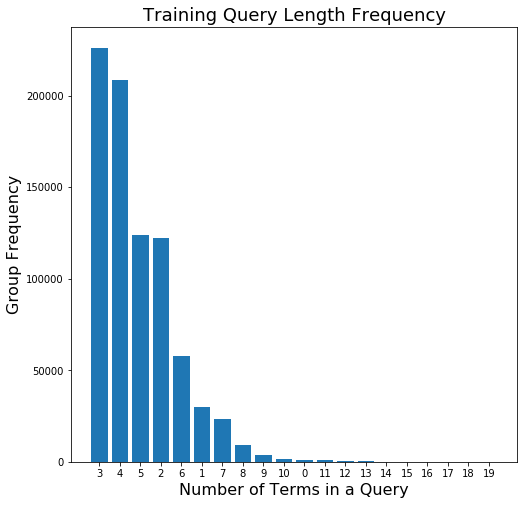

In [28]:
entry_list = q_tr.loc[:,'newtext']
entry_lengths = []
for entry in entry_list:
    if type(entry) == float:
        entry_lengths.append(0)
    else:
        entry_lengths.append(len(entry.split()))

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)

counts = dict(Counter(entry_lengths).most_common(20))
        
ax.set_title('Training Query Length Frequency', fontsize=18)

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

ax.bar(indexes, values, tick_label= labels)

ax.set_xlabel('Number of Terms in a Query', fontsize= 16)
ax.set_ylabel('Group Frequency', fontsize= 16)

# add labels
plt.show()

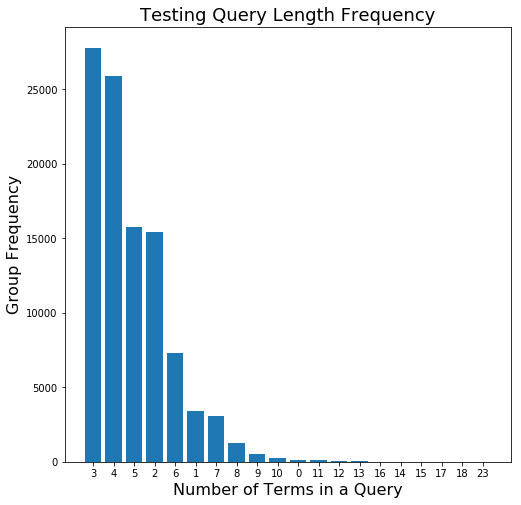

In [29]:
entry_list = q_te.loc[:,'newtext']
entry_lengths = []
for entry in entry_list:
    if type(entry) == float:
        entry_lengths.append(0)
    else:
        entry_lengths.append(len(entry.split()))

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
counts = dict(Counter(entry_lengths).most_common(20))

ax.set_title('Testing Query Length Frequency', fontsize=18)

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

ax.bar(indexes, values, tick_label= labels)
                    
ax.set_xlabel('Number of Terms in a Query', fontsize= 16)
ax.set_ylabel('Group Frequency', fontsize= 16)

plt.show()

# All of the Above on Relevant Passages

In [39]:
some_passages = pd.read_csv('some_passages.csv')

In [41]:
some_passages.head()

,Unnamed: 0,pid,text
0,0,16,approach base theori justic consid crime wrong...
1,1,60,inborn error bile acid synthesi produc cholest...
2,2,389,word convict elegcw mean bring light expos err...
3,3,435,longest word oxford english dictionari letter ...
4,4,448,postal code also known local variou countri th...


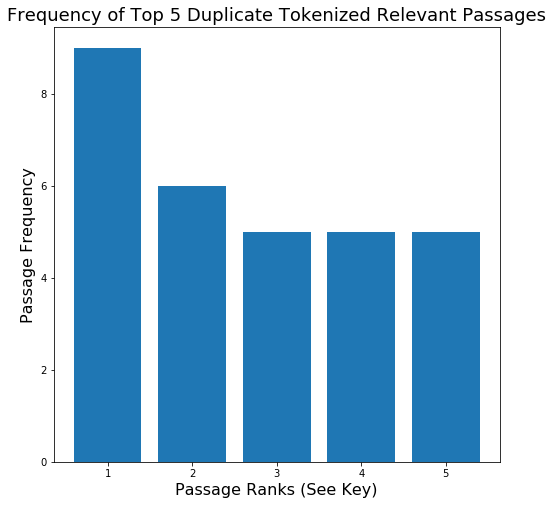

In [42]:
word_list = some_passages.loc[:,'text']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
counts = dict(Counter(word_list).most_common(5))

ax.set_title('Frequency of Top 5 Duplicate Tokenized Relevant Passages', fontsize=18)

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels)) + 1

bar_width = 0.35

ax.bar(indexes, values)

# add labels
ax.set_xticks(indexes)

ax.set_xlabel('Passage Ranks (See Key)', fontsize= 16)
ax.set_ylabel('Passage Frequency', fontsize= 16)

plt.show()

In [43]:
counts

{'ratio number resid zip code number sex offend number regist sex offend compar number resid thi zip code lot smaller state averag': 9,
 'ratio number resid zip code number sex offend number regist sex offend compar number resid thi zip code near state averag': 6,
 'credit card receipt statement length time keep whi day seven year keep origin receipt get monthli statement shred receipt two match keep statement seven year expens document': 5,
 'billabl medic code use indic diagnosi reimburs claim howev onli use claim date servic befor septemb claim date servic octob use equival code code': 5,
 'week week high highest sale price stock ha achiev dure regular trade hour dure recent week period week low lowest sale price stock ha fallen dure regular trade hour dure recent week period': 5}

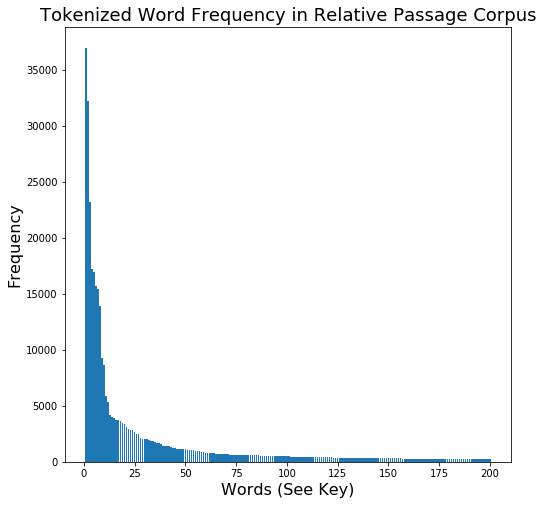

In [48]:
word_list = q_te.loc[:,'text'].str.cat(sep=' ').split()
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
counts = dict(Counter(word_list).most_common(200))

ax.set_title('Tokenized Word Frequency in Relative Passage Corpus', fontsize=18)

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels)) + 1

bar_width = 0.35

ax.bar(indexes, values)

# add labels

ax.set_xlabel('Words (See Key)', fontsize= 16)
ax.set_ylabel('Frequency', fontsize= 16)


plt.show()

In [50]:
counts

{'what': 36991,
 'is': 32216,
 'the': 23191,
 'how': 17226,
 'of': 16959,
 'a': 15697,
 'in': 15425,
 'to': 13886,
 'does': 9241,
 'for': 8646,
 'do': 5855,
 'are': 5316,
 'and': 4140,
 'who': 3985,
 'when': 3878,
 'on': 3758,
 'definition': 3708,
 'can': 3634,
 'you': 3464,
 'where': 3398,
 'long': 3087,
 'many': 2885,
 'was': 2846,
 'much': 2811,
 'did': 2631,
 'an': 2521,
 'cost': 2445,
 'it': 2157,
 'mean': 2078,
 'which': 2060,
 'number': 2006,
 'meaning': 1923,
 'why': 1889,
 'average': 1864,
 'from': 1747,
 'i': 1684,
 'be': 1662,
 'have': 1582,
 'get': 1431,
 'causes': 1418,
 'your': 1404,
 'county': 1368,
 'with': 1339,
 'name': 1235,
 'take': 1190,
 'weather': 1178,
 'that': 1175,
 'at': 1144,
 'used': 1126,
 'define': 1114,
 'make': 1094,
 'cause': 1084,
 'between': 1077,
 'time': 1012,
 'my': 999,
 'use': 983,
 'should': 963,
 'by': 893,
 'price': 856,
 'type': 826,
 'most': 815,
 'difference': 807,
 'phone': 797,
 'symptoms': 776,
 'as': 733,
 'temperature': 712,
 'water':

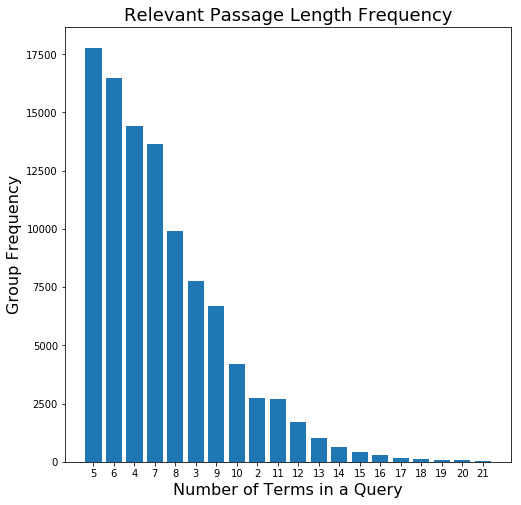

In [45]:
entry_list = q_te.loc[:,'text']
entry_lengths = []
for entry in entry_list:
    if type(entry) == float:
        entry_lengths.append(0)
    else:
        entry_lengths.append(len(entry.split()))

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
counts = dict(Counter(entry_lengths).most_common(20))

ax.set_title('Relevant Passage Length Frequency', fontsize=18)

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

ax.bar(indexes, values, tick_label= labels)
                    
ax.set_xlabel('Number of Terms in a Query', fontsize= 16)
ax.set_ylabel('Group Frequency', fontsize= 16)

plt.show()